In [1]:
import pandas as pd
#Step1: uploading the dataset
file_path='Fifa 23 Players Data.csv'
df=pd.read_csv(file_path)


In [2]:
#displaying few rows of the dataset
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
#if weight is in lbs convert it to kgs
#if height is in inches convert it to cms with the following code block
"""
df['Height'] = df['Height'].str.replace("'", ".").astype(float) * 30.48
df['Weight'] = df['Weight'].str.replace("lbs", "").astype(float) * 0.453592
"""

'\ndf[\'Height\'] = df[\'Height\'].str.replace("\'", ".").astype(float) * 30.48\ndf[\'Weight\'] = df[\'Weight\'].str.replace("lbs", "").astype(float) * 0.453592\n'

In [4]:
df['Weight']=df['Weight(in kg)']

In [5]:
df['Value'] = df['Value(in Euro)']
df['Wage'] = df['Wage(in Euro)']
df['Release Clause'] = df['Release Clause'].fillna(0)

In [6]:
#converting the joining date to datetime datatype
df['Joined On']=pd.to_datetime(df['Joined On'])
df['Joined_Year']=df['Joined On'].dt.year
df['Joined_Month']=df['Joined On'].dt.month
df['Joined On']=df['Joined On'].dt.day

In [9]:
try:
    df[['Club Name', 'Club Position']] = df['Club Position'].str.split('(', expand=True)
    df['Club Position'] = df['Club Position'].str.replace(')', '')
except ValueError:
    pass

In [10]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Weight,Value,Wage,Joined_Year,Joined_Month
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,67,62,53,62,22,67,54000000,195000,1970,1
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,67,63,58,63,21,81,64000000,450000,1970,1
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,67,64,63,64,22,81,84000000,420000,1970,1
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,82,78,72,78,24,70,107500000,350000,1970,1
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,70,66,57,66,21,73,190500000,230000,1970,1


Data Cleaning and Transformation was performed above. Now after final data filtering, the modifications will be converted to excel.

In [15]:
#Handling missing values
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#Keeping players with overall rating above 80
df_filtered=df[df['Overall']>=80]

#diaplaying filtered data frame
print(df_filtered.head())

         Known As           Full Name  Overall  Potential  Value(in Euro)  \
0        L. Messi        Lionel Messi       91         91        54000000   
1      K. Benzema       Karim Benzema       91         91        64000000   
2  R. Lewandowski  Robert Lewandowski       91         91        84000000   
3    K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4       K. Mbappé       Kylian Mbappé       91         95       190500000   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   
2               ST            ST      Poland   
3           CM,CAM            CM     Belgium   
4            ST,LW            ST      France   

                                         Image Link  Age  ...  RWB Rating  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...          67   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...          67   
2  https://cdn.so

In [18]:

#Saving the modified DataFrame to an Excel file
df.to_excel('Update Fifa 23 Players.xlsx', index= False)

Several Exploratory Data Analysis processes are performed below.

In [19]:
#1.Summary Statistics
summary_stats = df.describe()
print(summary_stats)

            Overall     Potential  Value(in Euro)           Age  \
count  18539.000000  18539.000000    1.853900e+04  18539.000000   
mean      65.852042     71.016668    2.875461e+06     25.240412   
std        6.788353      6.192866    7.635129e+06      4.718163   
min       47.000000     48.000000    0.000000e+00     16.000000   
25%       62.000000     67.000000    4.750000e+05     21.000000   
50%       66.000000     71.000000    1.000000e+06     25.000000   
75%       70.000000     75.000000    2.000000e+06     29.000000   
max       91.000000     95.000000    1.905000e+08     44.000000   

       Height(in cm)  Weight(in kg)    TotalStats     BaseStats  \
count   18539.000000   18539.000000  18539.000000  18539.000000   
mean      181.550839      75.173904   1602.114569    357.946221   
std         6.858097       7.013593    273.160237     39.628259   
min       155.000000      49.000000    759.000000    224.000000   
25%       177.000000      70.000000   1470.000000    331.0000

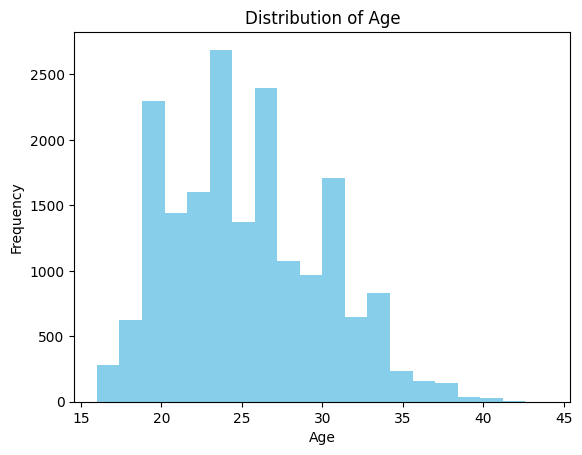

In [20]:
#2.Distribution Plots(age)
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

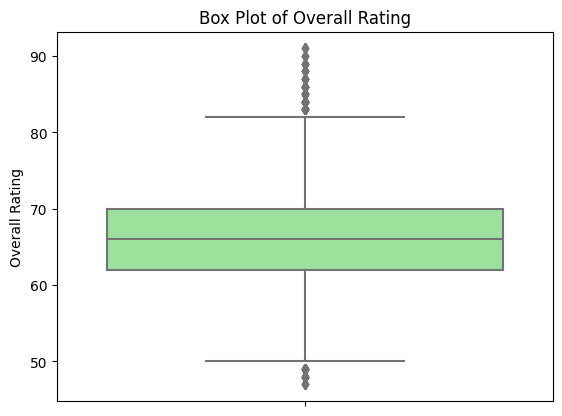

In [22]:
#3.Box plots(overall rating)
import seaborn as sns

sns.boxplot(data=df, y="Overall", color='lightgreen')
plt.ylabel('Overall Rating')
plt.title('Box Plot of Overall Rating')
plt.show()

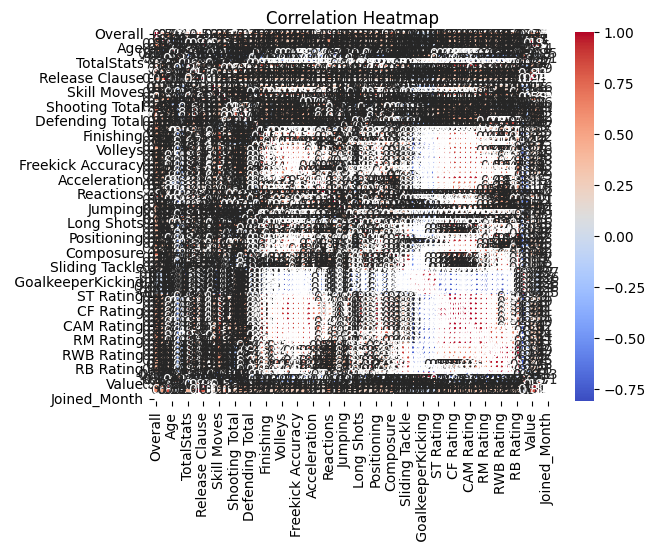

In [26]:
#4.Correlation Heatmap

#selecting only the numeric columns
numeric_columns=df.select_dtypes(include=['number'])

correlation_matrix=numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

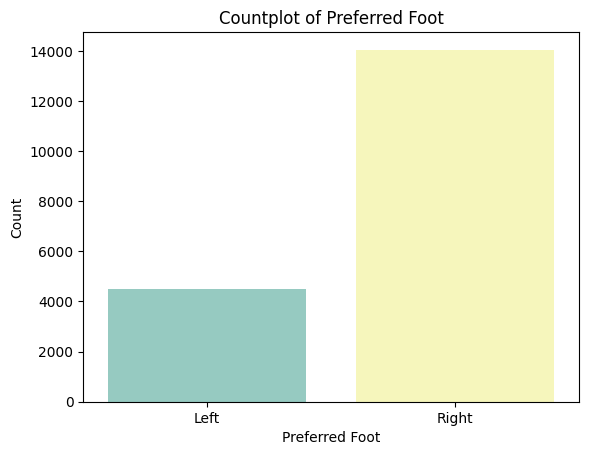

In [27]:
#5.Countplot(Preffered foot)
sns.countplot(data=df, x='Preferred Foot', palette='Set3')
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.title('Countplot of Preferred Foot')
plt.show()

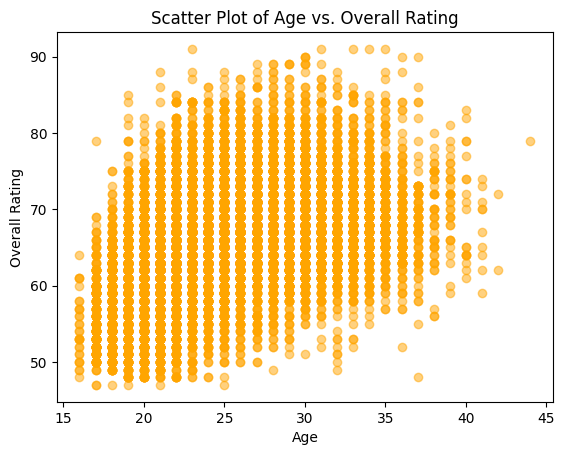

In [28]:
#6.Scatter plot(Age vs Overall Rating)
plt.scatter(df['Age'], df['Overall'], alpha=0.5, color='orange')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Scatter Plot of Age vs. Overall Rating')
plt.show()

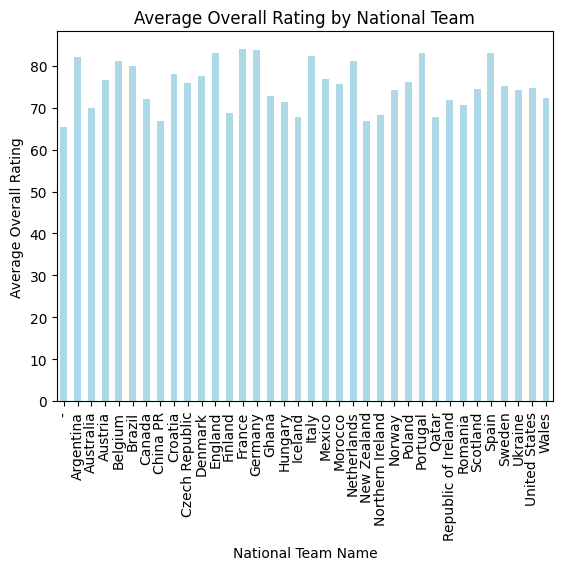

In [29]:
#7.Bar plot(Average overall rating by national team name)
avg_rating_by_national_team = df.groupby('National Team Name')['Overall'].mean()
avg_rating_by_national_team.plot(kind='bar', color='lightblue')
plt.xlabel('National Team Name')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by National Team')
plt.xticks(rotation=90)
plt.show()

c:\Users\Rohan Nivash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


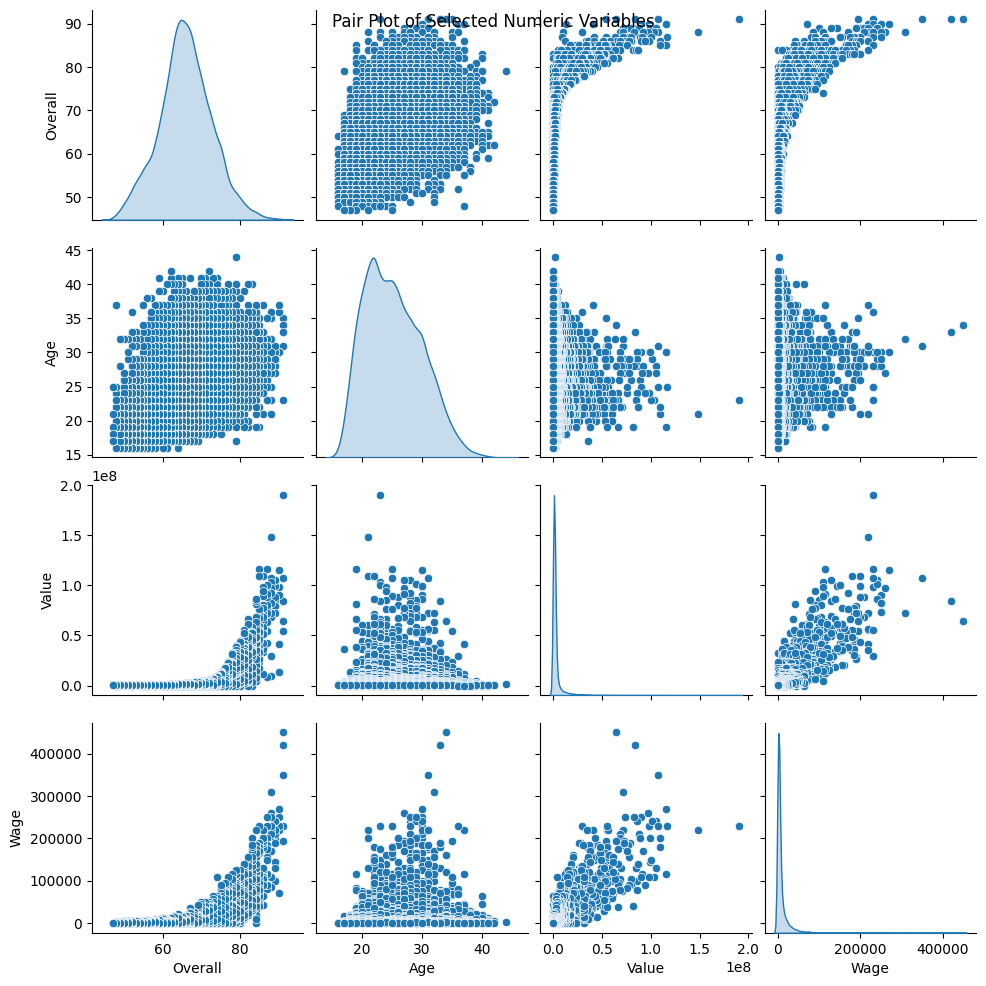

In [30]:
#8.Pair plot(selected numeric variables)
selected_vars = ['Overall', 'Age', 'Value', 'Wage']
sns.pairplot(df[selected_vars], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numeric Variables')
plt.show()